# Load/import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from preprocess import *
from lasso_fits import *
from rf_fits import *

# Data

## Pre-process

Time averaged

In [3]:
# bxm,bym,jxm,jym,emfx,emfy,u2tot,b2tot
# tres,Rm,uave,kf,tt
pth='../data/alpha2/'

mf15 = np.load(pth + 'mfields_R15e3.npz')
mf9  = np.load(pth + 'mfields_R9e3.npz') 
mf5  = np.load(pth + 'mfields_R5e3.npz')
mf1  = np.load(pth + 'mfields_R1e3.npz') 
mf05 = np.load(pth + 'mfields_R5e2.npz')

In [4]:
# Time in resistive units for Rm=15e4 run
tres_R15e4=mf15['tt']/mf15['tres']
print(mf15['tres'])

149.09657903158052


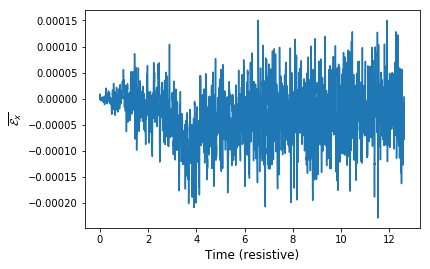

In [5]:
plt.plot(mf15['tt']/mf15['tres'],mf15['emfx'][:,192])
plt.xlabel('Time (resistive)', fontsize=12)
plt.ylabel(r'$\overline{\mathcal{E}_x}$', fontsize=12)
plt.savefig('emfx.pdf', bbox_inches='tight')

In [6]:
pth='../data/alpha2/'

df15 = gen_df_zave_log(fname=pth + 'mfields_R15e3.npz',z1=0)#,verbose=0)
df9  = gen_df_zave_log(fname=pth + 'mfields_R9e3.npz', z1=0)#,verbose=0)
df5  = gen_df_zave_log(fname=pth + 'mfields_R5e3.npz', z1=0)#,verbose=0)
df1  = gen_df_zave_log(fname=pth + 'mfields_R1e3.npz', z1=0)#,verbose=0)
df05 = gen_df_zave_log(fname=pth + 'mfields_R5e2.npz', z1=0)#,verbose=0)

Generating z averaged dataframe with z1: 0 and z2: -1
Generating z averaged dataframe with z1: 0 and z2: -1
Generating z averaged dataframe with z1: 0 and z2: -1


/home/fnauman/python3/sklearn/may2019/preprocess.py:180: RuntimeWarning: divide by zero encountered in log10
  'Ex2l': np.log10(ave_z(Exm**2,zone=z1,ztwo=z2)),
/home/fnauman/python3/sklearn/may2019/preprocess.py:181: RuntimeWarning: divide by zero encountered in log10
  'Ey2l': np.log10(ave_z(Eym**2,zone=z1,ztwo=z2))


Generating z averaged dataframe with z1: 0 and z2: -1
Generating z averaged dataframe with z1: 0 and z2: -1


In [7]:
bxm,bym,jxm,jym,Exm,Eym = read_mf(fname=pth + 'mfields_R15e3.npz')

In [8]:
t1 = 0
t2 = -1
n_win = 20

In [9]:
me = (mf15['bxm'][n_win:-2]**2 + mf15['bym'][n_win:-2]**2)/mf15['uave']**2

In [10]:
Ex2l_rolmean = df15['Ex2l'].iloc[t1:t2].rolling(window=n_win).mean()
#print(Ex2l_rolmean.shape,Ex2l_rolmean.head(n_win))
#print(Ex2l_rolmean[n_win:].shape)

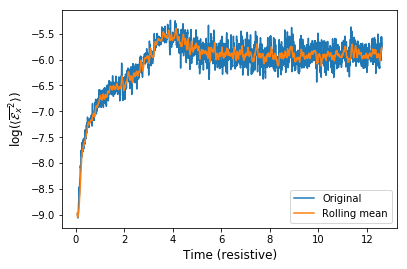

In [11]:
plt.plot(tres_R15e4[n_win:-2],np.log10(np.mean(mf15['emfx'][n_win:-2]**2/mf15['uave']**2,axis=1)), label='Original')
plt.plot(tres_R15e4[n_win:-2],Ex2l_rolmean[n_win:-1], label='Rolling mean')
plt.xlabel('Time (resistive)', fontsize=12)
plt.ylabel(r'$\log(\langle\overline{\mathcal{E}_x}^2\rangle)$', fontsize=12)
plt.legend()
plt.savefig('emfx2.pdf', bbox_inches='tight')

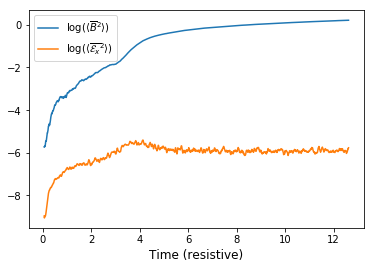

In [12]:
plt.plot(tres_R15e4[n_win:-2],np.log10(np.mean(me,axis=1)),label=r'$\log(\langle\overline{B}^2\rangle)$')  
#plt.plot(tres_R15e4[n_win:-2],np.log10(np.mean(mf15['emfx'][n_win:-2]**2/mf15['uave']**2,axis=1)), label='Original')
plt.plot(tres_R15e4[n_win:-2],Ex2l_rolmean[n_win:-1], label=r'$\log(\langle\overline{\mathcal{E}_x}^2\rangle)$')
plt.xlabel('Time (resistive)', fontsize=12)
#plt.ylabel(r'$\log(\langle\overline{\mathcal{E}_x}^2\rangle)$', fontsize=12)
plt.legend()
plt.savefig('log_emf_vs_b2.pdf', bbox_inches='tight')

In [13]:
t3 = int(2.0 * mf15['tres'])
Ex2l_kin_rolmean = df15['Ex2l'].iloc[t1:t3].rolling(window=n_win).mean()
#Ex2l_kin_rolmean.head(n_win)

t4 = int(8.0 * mf15['tres'])
Ex2l_sat_rolmean = df15['Ex2l'].iloc[t1:t4].rolling(window=n_win).mean()
#Ex2l_rolmean.iloc[n_win:].isna().sum() = 0

In [14]:
#df15['Bx2l'].iloc[t1:t2].plot()

In [15]:
df_kin_win = (df15[t1:t3]).copy()
df_sat_win = (df15[t1:t4]).copy()

In [16]:
df_kin_win['Ex2l'] = Ex2l_kin_rolmean
df_sat_win['Ex2l'] = Ex2l_sat_rolmean

In [17]:
df_kin_win_nona = df_kin_win.iloc[n_win:,:]
df_sat_win_nona = df_sat_win.iloc[n_win:,:]

In [18]:
#df_sat_win.head()
df_kin_win_nona.tail()

,Bx2l,By2l,Jx2l,Jy2l,Ex2l,Ey2l
293,-3.671680,-3.718823,-1.464373,-1.484611,-6.886859,-7.095296
294,-3.670880,-3.725742,-1.469945,-1.469727,-6.882266,-6.950773
295,-3.668285,-3.723739,-1.475501,-1.475302,-6.872266,-6.817544
296,-3.666288,-3.718188,-1.487381,-1.464201,-6.867582,-6.765932
297,-3.667119,-3.707442,-1.488803,-1.438968,-6.860983,-6.802452


# Lasso

## Linear basis

Test size: 0.2
Test,train shapes: (235, 4) (937, 4)
Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.0s finished


Tuned Lasso Alpha: {'lasso__alpha': 0.001}
Tuned Lasso Score: -0.3911469777580601
BEST FIT model
Mean Absolute Error: 0.3911469777580601
LASSO score: -2.653258990839585
Coefficients: [0.07713198 0.41139681 0.23841425 0.19788327]


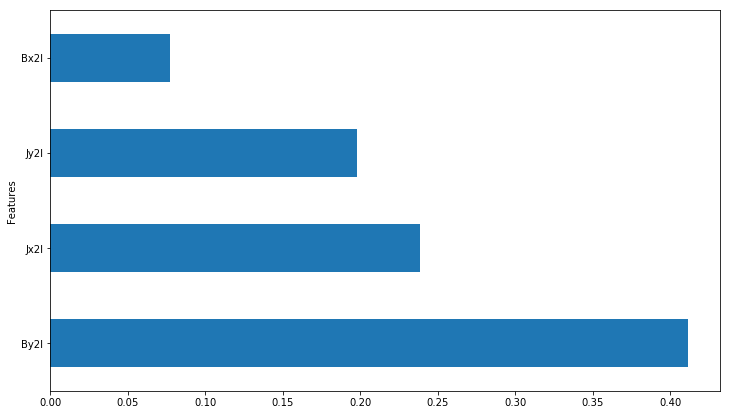

In [19]:
df15_ss, scl_las = scale_df(df_sat_win_nona)
y_train_lasso,y_pred_lasso,y_test_lasso = lasso_gridcv(df15_ss, 
        pth='time_linear_lasso/', test_size=0.2, fld='Ex2l',zave=True)

# Random forests

## Linear basis

Test size: 0.2
Test,train shapes: (235, 4) (937, 4)
Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:    1.8s finished


MAE: 0.2955922065536544
Tuned RF params: {'rf__max_depth': 8, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 16, 'rf__n_estimators': 32}
Tuned RF score:  -0.11052237237706225
MAE: 0.2955922065536544
R^2: -3.477193461746827
Best model important features: SKLEARN
[0.26255482 0.73129071 0.00443915 0.00171532]


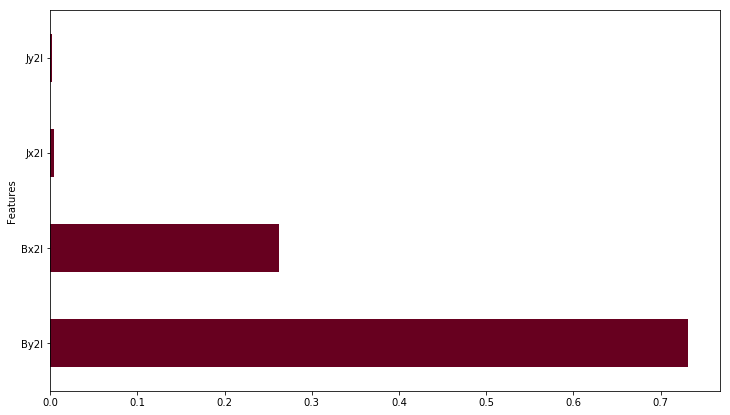

In [20]:
y_train_rf,y_pred_rf,y_test_rf = rf_gridcv(df_sat_win_nona, 
    pth='time_linear_rf/', fld='Ex2l', 
    zave=True, err_metric='mse')

In [21]:
np.allclose(y_pred_lasso, y_pred_rf)

False

In [22]:
(y_pred_lasso == y_pred_rf).all()

False

In [23]:
print(y_pred_lasso.shape,y_pred_rf.shape)
print(y_train_lasso.shape,y_train_rf.shape)

(235,) (235,)
(937,) (937,)


In [24]:
print(scl_las.mean_, scl_las.scale_)

[-2.96731875 -2.94792457 -1.33676951 -1.3367435  -6.5479656  -6.49200599] [1.04108902 1.04125252 0.40890023 0.41092204 0.72616113 0.73392715]


In [25]:
tres_plt = tres_R15e4[n_win:y_train_rf.shape[0] + n_win + y_pred_rf.shape[0]]

print(df_sat_win_nona['Ex2l'].shape, tres_plt.shape)

(1172,) (1172,)


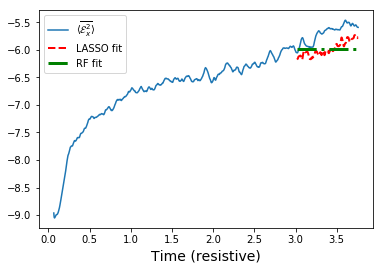

In [26]:
fig, ax = plt.subplots()
        
y_pred_lasso2 = y_pred_lasso * scl_las.scale_[np.newaxis,4] + scl_las.mean_[np.newaxis,4]
    
fld_label = r"$\langle \overline{\mathcal{E}_x^2}\rangle$" #if fld=='Ex' else r"$\mathcal{E}_y$"
        
# Change df_kin to df_sat for saturated fits!!
ax.plot(tres_plt,df_sat_win_nona['Ex2l'],label=fld_label)
#ax.plot(tres_plt[:y_train.shape[0]],y_trainrf,'r',lw=3,label="Train data")
#ax.plot(tres_plt[y_train.shape[0]:],y_testrf,label="Test data")
ax.plot(tres_plt[y_train_lasso.shape[0]:], y_pred_lasso2, 'r--', lw=2, label="LASSO fit")
ax.plot(tres_plt[y_train_rf.shape[0]:], y_pred_rf, 'g-.', lw=3, label="RF fit")

ax.legend()
ax.set_xlabel('Time (resistive)',fontsize=14)
    
fig.savefig('df15_TIME_sat_comparison.pdf',bbox_inches='tight')

In [27]:
list(mf15)

['tres',
 'Rm',
 'uave',
 'kf',
 'tt',
 'bxm',
 'bym',
 'b2tot',
 'u2tot',
 'emfx',
 'emfy',
 'jxm',
 'jym']